<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
# !pip install ydata_profiling

In [57]:
# Импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import (train_test_split as tts,
                                     RandomizedSearchCV as rscv)

In [3]:
# Импорт данных

try:
    data = pd.read_csv('taxi.csv', index_col=[0], parse_dates=[0])
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [8]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
print(data.index.is_monotonic)

True


In [5]:
# Ресемпл данных по одному часу
data.sort_index(inplace=True)
data = data.resample('1H').sum()

## Анализ

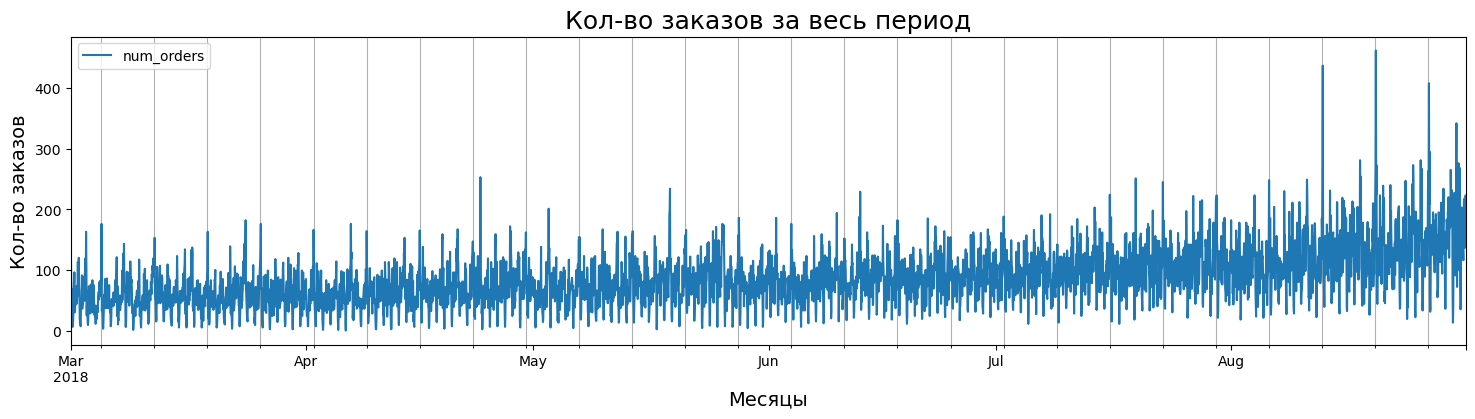

In [56]:
# График за все время

figsize = (18, 4)
data.plot(figsize=figsize)
plt.grid(which='minor')
plt.title('Кол-во заказов за весь период', fontsize=18)
plt.xlabel('Месяцы', fontsize=14)
plt.ylabel('Кол-во заказов', fontsize=14)
plt.show()

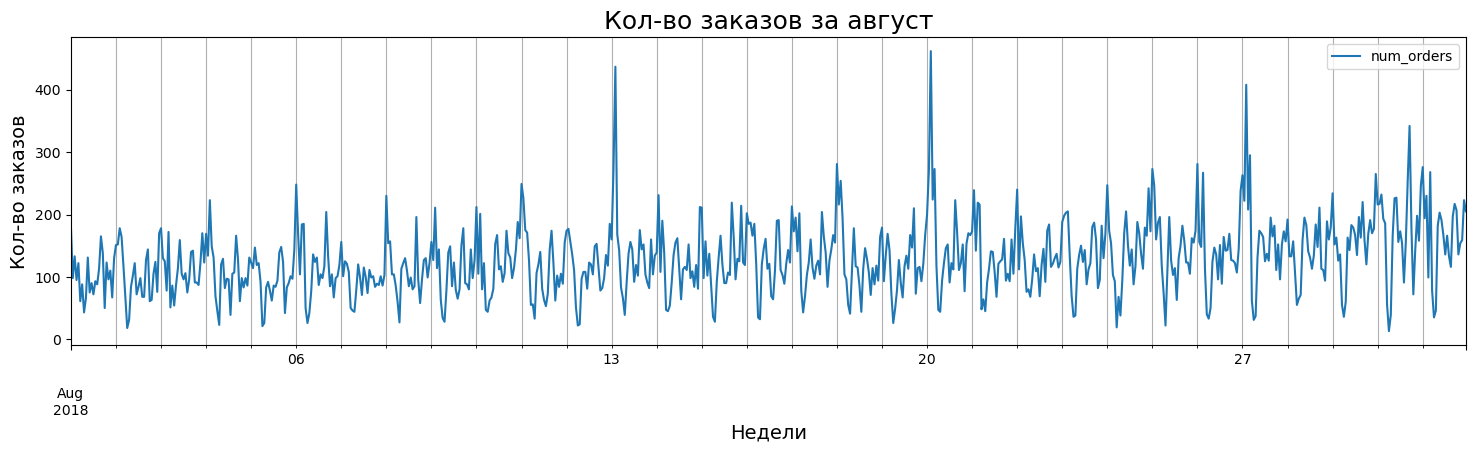

In [52]:
# График за август

figsize = (18, 4)
data_aug = data['2018-08-01':]
data_aug.plot(figsize=figsize)
plt.grid(which='minor')
plt.title('Кол-во заказов за август', fontsize=18)
plt.xlabel('Недели', fontsize=14)
plt.ylabel('Кол-во заказов', fontsize=14)
plt.show()

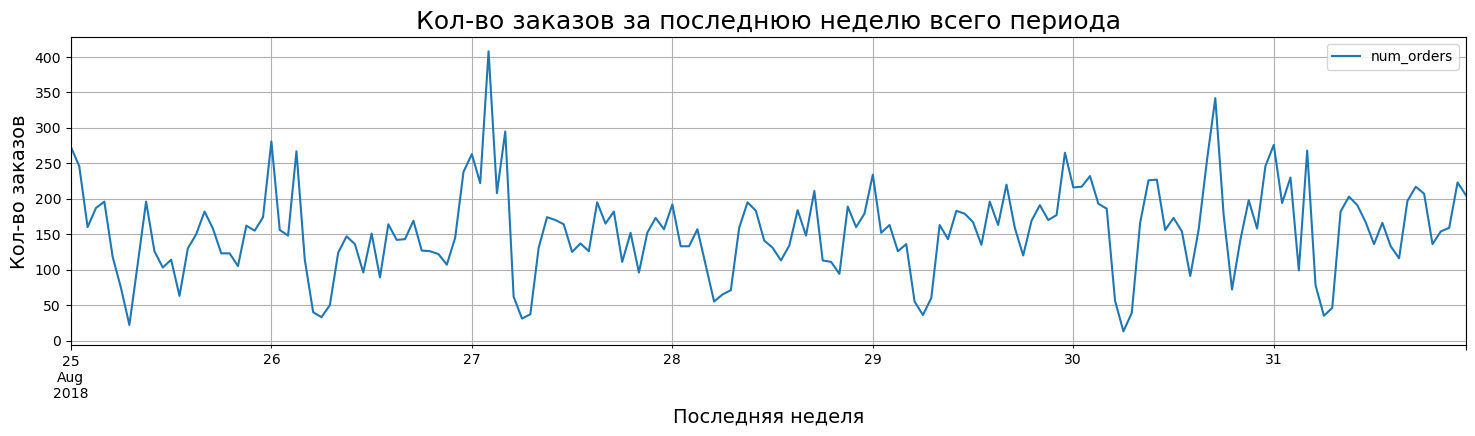

In [50]:
# График за последнюю неделю

figsize = (18, 4)
data_aug_last_week = data['2018-08-25':]
data_aug_last_week.plot(figsize=figsize)
plt.grid(which='both')
plt.title('Кол-во заказов за последнюю неделю всего периода', fontsize=18)
plt.xlabel('Последняя неделя', fontsize=14)
plt.ylabel('Кол-во заказов', fontsize=14)
plt.show()

## Обучение

## Тестирование

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48